##Get GNSS values for lake survey

This guide helps to obtain the WSE for lakes when using Septrentrio GNSS
Steps:
Pre steps
0.0. Extract the Septentrio receivers' file .SBF
0.1. Prepare the file with the field data format
1. Convert native GNSS data to the Receiver Independent Exchange Format (RINEX) file type.
1.2. For the conversion use use SBF Converter, which is part of the Septentrio RxTools software package, which is freely available via the septentrio website. 
2. RINEX file is submitted for postprocessing using PPP software: https://webapp.geod.nrcan.gc.ca/geod/tools-outils/ppp.php.
3. Once downloading the files, use this script to:
3.1. Read the single or multiple csv files generated by the ppp software
3.2. If single file, only filter data in the valid time
3.3. If multiple file, unify the data and filter data in the valid time
3.4. Get the orthometric height using the software 
     NOTE: Specify the Geoid model used for this calculation. A useful resourse https://observablehq.com/@cehanagan/geoid-height-calculator#understanding-the-geoid-calculation
3.5. Get the median height of the Antenna (mH) and the standard deviation of the antenna heights (stdH)
3.6. Subtract the median height from the antenna to the water surface (mHA) from the orthometric height. NOTE: I'm using the median, but the mean is also used
3.7. Calculate the standard deviation of the antenna height (stdA)
3.8. Calculate the mean error (stdH+stdA+0.01 m). where 0.01 is the absolute error of the antenna heights
3.9. Prepare output results

In [3]:
#Add the antena to files
#open all the files
#Seach for line 7 (starting from line 1)
#Replace line 
'Unknown             Unknown                                 ANT # / TYPE        '
#with 
'Unknown             SEPPOLANT_X_MF                          ANT # / TYPE        '
#Save the file
import glob
import pandas as pd
import numpy as np

In [7]:
dir='../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/'
all_files = glob.glob(dir+'RINEX/*.obs')
all_files

['../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22236_LOG2_SEPT236x.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22237_LOG2_SEPT237v.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22236_LOG1_SEPT2360_formatted.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22237_LOG2_SEPT237p.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22235_LOG2_SEPT235x_formatted.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22237_LOG2_SEPT237x_formatted.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22236_LOG2_SEPT236r_formatted.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22235_LOG1_SEPT2350.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22235_LOG2_SEPT235x.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22237_LOG2_SEPT237x.obs',
 '../data/

In [3]:

for fname in all_files:
    with open(fname, 'r') as f:
        fcontent=f.readlines()
        fcontent[6]= 'Unknown             SEPPOLANT_X_MF                          ANT # / TYPE        \n'
        fnew_name=fname[:-4]+'_formatted.obs'
        nf=open(fnew_name, 'w')
        nf.writelines(fcontent)
        f.close()
        nf.close()
        continue
        

In [9]:
all_files

['../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22236_LOG2_SEPT236x.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22237_LOG2_SEPT237v.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22236_LOG1_SEPT2360_formatted.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22237_LOG2_SEPT237p.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22235_LOG2_SEPT235x_formatted.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22237_LOG2_SEPT237x_formatted.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22236_LOG2_SEPT236r_formatted.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22235_LOG1_SEPT2350.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22235_LOG2_SEPT235x.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22237_LOG2_SEPT237x.obs',
 '../data/

22152_LOG2_20220601_Day3B_formatted.obs	graphics	residuals	GPS & GLONASS	NRCan/IGS Final	
Warning : Ambiguity Resolution has been deactivated since your phase modulations are not aligned. All phase observations must be aligned in RINEX 3.01 and later files and the new SYS / PHASE SHIFT header is mandatory. If the phase alignment is not known, then the observation data should not be published in a RINEX 3.0x file. In order to facilitate data processing, phase observations stored in RINEX files must be consistent across all satellites of a satellite system and across each frequency band.


22235_LOG1_SEPT2350_formatted.obs	graphics	residuals	GPS & GLONASS	NRCan/IGS Final	
Warning : Ambiguity Resolution has been deactivated since your phase modulations are not aligned. All phase observations must be aligned in RINEX 3.01 and later files and the new SYS / PHASE SHIFT header is mandatory. If the phase alignment is not known, then the observation data should not be published in a RINEX 3.0x file. In order to facilitate data processing, phase observations stored in RINEX files must be consistent across all satellites of a satellite system and across each frequency band.
Warning : Approximate position in RINEX header record was not used. Current solution is using a priori position initialized using a pseudo-range only solution.

22235_LOG2_SEPT235v_formatted.obs	graphics	residuals	GPS & GLONASS	NRCan/IGS Final	
Warning : Ambiguity Resolution has been deactivated since your phase modulations are not aligned. All phase observations must be aligned in RINEX 3.01 and later files and the new SYS / PHASE SHIFT header is mandatory. If the phase alignment is not known, then the observation data should not be published in a RINEX 3.0x file. In order to facilitate data processing, phase observations stored in RINEX files must be consistent across all satellites of a satellite system and across each frequency band.

In [35]:
#1. Read the master file
#2. Read the files from PPP
#2.1 Distinguish between 15 s and 1 s measurements LOG1 vs LOG2

import os
from fnmatch import fnmatch


def get_time_series_GNSS(root, pattern):
    df_all_15s=pd.DataFrame()
    df_all_1s=pd.DataFrame()
    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern):
                #print(name.split('_'))
                file_info=name.split('_')
                if len(file_info)>1:
                    date=file_info[0]
                    type_time=file_info[1]
                    df=pd.read_csv(os.path.join(path, name), sep=',')
                    if type_time=='LOG1':
                        df_all_15s=pd.concat([df_all_15s, df])
                    else:
                        df_all_1s=pd.concat([df_all_1s, df])
    return df_all_15s, df_all_1s


In [121]:
root = '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/ppp_output/'
pattern = "*.csv"
df_all_AC_15s, df_all_AC_1s=get_time_series_GNSS(root, pattern)

<AxesSubplot: >

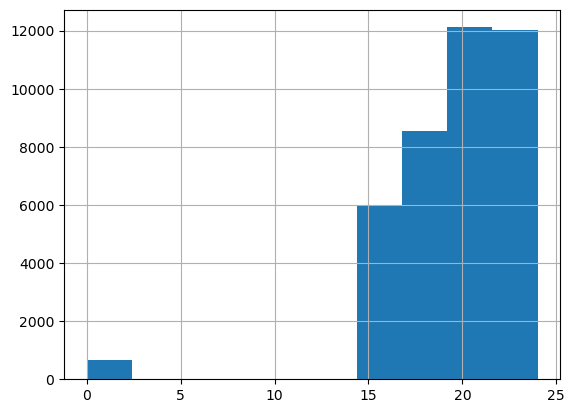

In [122]:
df_all_AC_1s.decimal_hour.hist()
# df_all_15s.to_csv('../data/results/all_gnss_15s.csv', sep=',')
# df_all_1s.to_csv('../data/results/all_gnss_1s.csv', sep=',')

In [123]:
df_all_AC_1s.rename(columns={"latitude_decimal_degree":'latitude', "longitude_decimal_degree":"longitude","ellipsoidal_height_m":"elevation"}, inplace=True)
df_all_AC_15s.rename(columns={"latitude_decimal_degree":'latitude', "longitude_decimal_degree":"longitude","ellipsoidal_height_m":"elevation"}, inplace=True)
# df_all_1s[[]].to_csv('../data/results/all_gnss_1s.csv', sep=',', index=False)

In [124]:
df_all_AC_1s

,latitude,longitude,elevation,decimal_hour,day_of_year,year,rcvr_clk_ns
0,53.531798,-112.998734,733.7647,15.86500,237,2022,-1.565777e+07
1,53.531798,-112.998734,733.7600,15.86528,237,2022,-1.565763e+07
2,53.531798,-112.998734,733.7578,15.86556,237,2022,-1.565750e+07
3,53.531798,-112.998733,733.8598,15.86583,237,2022,-1.565737e+07
4,53.531798,-112.998733,733.8652,15.86611,237,2022,-1.565724e+07
...,...,...,...,...,...,...,...
22,53.249103,-112.890087,744.0329,19.00611,237,2022,-2.740250e+05
23,53.249103,-112.890087,744.0203,19.00639,237,2022,-2.740251e+05
24,53.249103,-112.890087,744.0335,19.00667,237,2022,-2.740252e+05
25,53.249103,-112.890087,744.0324,19.00694,237,2022,-2.740253e+05


In [13]:
#Read notes file
root='../data/GNSS/'
df_lakes=pd.read_csv(root+'notes.csv')


In [14]:
df_lakes['median_h']=[np.median([x[1][2],x[1][3],x[1][4]]) for x in df_lakes.iterrows()]
df_lakes['std_h']=[np.std([x[1][2],x[1][3],x[1][4]]) for x in df_lakes.iterrows()]

In [15]:
#list of lakes in Alberta

list_lakes=df_lakes.loc[df_lakes['day_of_year']>=235,'Lake'].unique()
list_lakes

array(['Skeleton Lake', 'Amisk Lake', 'Goose Lake', 'Walter', 'Oster',
       'Tawayik', 'Astotin', 'Bennett', 'Miguelon', 'Islet', 'Half Moon'],
      dtype=object)

In [116]:
#For each lake
#Get date, median heigth, std_height at the start and end time
#filter df15s and df1s
def get_data_for_lake(df_lakes, list_lakes, df_all_15s, df_all_1s):
    date_fd='decimal_hour'
    df_15s=pd.DataFrame()
    df_1s=pd.DataFrame()
    for lake in list_lakes:
        start_row=((df_lakes['Lake']==lake)&(df_lakes['Start_End']=='S'))
        end_row=((df_lakes['Lake']==lake)&(df_lakes['Start_End']=='E'))    
        
        doy=df_lakes.loc[start_row,'day_of_year'].iloc[0]
        start_date=df_lakes.loc[start_row, 'decimal_utc'].iloc[0]
        end_date=df_lakes.loc[end_row, 'decimal_utc'].iloc[0]

        start_antena_H=df_lakes.loc[start_row, 'median_h'].iloc[0]
        end_antena_H=df_lakes.loc[end_row, 'median_h'].iloc[0]

        start_antena_stdH=df_lakes.loc[start_row, 'std_h'].iloc[0]
        end_antena_stdH=df_lakes.loc[end_row, 'std_h'].iloc[0]

        #Filter df_all_15s and df_all_1s
        df_gps_lake_15s=df_all_15s.loc[(df_all_15s['day_of_year']==doy)&(df_all_15s[date_fd]>=start_date)&(df_all_15s[date_fd]<=end_date)].copy()
        print(start_date, df_gps_lake_15s.shape)
        print(end_date, 'End date 15' )
        if df_gps_lake_15s.shape[0]!=0:
            df_gps_lake_15s['lake']=lake
            df_15s=pd.concat([df_15s,df_gps_lake_15s])
            ###For now extracting each value
            df_gps_lake_15s[['latitude','longitude','elevation']].to_csv('../data/GNSS/gnss_15s_lake_'+lake+'.csv', sep=',', index=False)
        else:
            print("no data found for this lake", lake)
        df_gps_lake_1s=df_all_1s.loc[(df_all_1s['day_of_year']==doy)&(df_all_1s[date_fd]>=start_date)&(df_all_1s[date_fd]<=end_date)].copy()
        print(start_date, df_gps_lake_1s.shape)
        print(end_date, 'End date 1' )
        if df_gps_lake_1s.shape[0]!=0:
            df_gps_lake_1s['lake']=lake
            df_1s=pd.concat([df_1s,df_gps_lake_1s])
            ### For now, exporting each data range
            df_gps_lake_1s[['latitude','longitude','elevation']].to_csv('../data/GNSS/gnss_1s_lake_'+lake+'.csv', sep=',', index=False)
        else:
            print("no data found for this lake", lake)
    return df_15s, df_1s

In [127]:
df_AC_15s, df_AC_1s=get_data_for_lake(df_lakes, list_lakes, df_all_AC_15s, df_all_AC_1s)

20.01 (57, 7)
21.02 End date 15
20.01 (863, 7)
21.02 End date 1
22.02 (67, 7)
23.02 End date 15
22.02 (1009, 7)
23.02 End date 1
16.01 (221, 7)
17.01 End date 15
16.01 (3363, 7)
17.01 End date 1
18.01 (0, 7)
18.01 End date 15
no data found for this lake Walter
18.01 (1, 7)
18.01 End date 1
19.01 (176, 7)
20.01 End date 15
19.01 (2641, 7)
20.01 End date 1
20.01 (45, 7)
21.02 End date 15
20.01 (731, 7)
21.02 End date 1
23.02 (0, 7)
0.02 End date 15
no data found for this lake Astotin
23.02 (0, 7)
0.02 End date 1
no data found for this lake Astotin
15.01 (35, 7)
16.01 End date 15
15.01 (523, 7)
16.01 End date 1
18.01 (212, 7)
19.01 End date 15
18.01 (3209, 7)
19.01 End date 1
20.01 (176, 7)
21.01 End date 15
20.01 (2634, 7)
21.01 End date 1
22.02 (151, 7)
23.02 End date 15
22.02 (2276, 7)
23.02 End date 1


In [128]:
df_AC_1s.lake.unique()
# list_lakes

array(['Skeleton Lake', 'Amisk Lake', 'Goose Lake', 'Walter', 'Oster',
       'Tawayik', 'Bennett', 'Miguelon', 'Islet', 'Half Moon'],
      dtype=object)

In [27]:
df_15s.columns

Index(['latitude', 'longitude', 'elevation', 'decimal_hour', 'day_of_year',
       'year', 'rcvr_clk_ns', 'lake'],
      dtype='object')

In [28]:
df_1s[['latitude','longitude','elevation','lake']].to_csv('../data/GNSS/gnss_1s_lakes_canada.csv', sep=',', index=False)
df_15s[['latitude','longitude','elevation','lake']].to_csv('../data/GNSS/gnss_15s_lakes_canada.csv', sep=',', index=False)

In [4]:
#Read all the files again by lake
#1. Read the master file
#2. Read the files from PPP
#2.1 Distinguish between 15 s and 1 s measurements LOG1 vs LOG2

import os
from fnmatch import fnmatch

root = '../data/GNSS/geoidheight/'
pattern = "*.csv"
df_all_1s_final=pd.DataFrame()

for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            print(name.split('_'))
            file_info=name.split('_')
            if len(file_info)>1:
                lake=file_info[3].split('.')[0]
                df=pd.read_csv(os.path.join(path, name), sep=',')
                df['lake']=lake
                df_all_1s_final=pd.concat([df_all_1s_final, df])
            


['geoid', 'height', '2023-01-31', 'Half Moon.csv']
['geoid', 'height', '2023-01-31', 'Panther Lake.csv']
['geoid', 'height', '2023-01-31', 'Moraine Lake.csv']
['geoid', 'height', '2023-01-31', 'Oster.csv']
['geoid', 'height', '2023-01-31', 'Diken Pond.csv']
['geoid', 'height', '2023-01-31', 'Cossayuna Lake.csv']
['geoid', 'height', '2023-01-31', 'Skeleton Lake.csv']
['geoid', 'height', '2023-01-31', 'Roquette Lake.csv']
['geoid', 'height', '2023-01-31', 'Tawayik.csv']
['geoid', 'height', '2023-01-31', 'Bennett.csv']
['geoid', 'height', '2023-01-31', 'Amisk Lake.csv']
['geoid', 'height', '2023-01-31', 'Arnold Lake.csv']
['geoid', 'height', '2023-01-31', 'Miguelon.csv']
['geoid', 'height', '2023-01-31', 'Islet.csv']
['geoid', 'height', '2023-01-31', 'Goose Lake.csv']
['geoid', 'height', '2023-01-31', 'Walter.csv']
['geoid', 'height', '2023-01-31', 'Eagle Pond.csv']


In [46]:
# df_all_1s_final['lake'].unique()
# df_all_1s_final.plot(kind='scatter', y='Ortho Height (m)', x='index', subplots=True )
list_lakes=df_all_1s_final['lake'].unique()
list_lakes

array(['Half Moon', 'Panther Lake', 'Moraine Lake', 'Oster', 'Diken Pond',
       'Cossayuna Lake', 'Skeleton Lake', 'Roquette Lake', 'Tawayik',
       'Bennett', 'Amisk Lake', 'Arnold Lake', 'Miguelon', 'Islet',
       'Goose Lake', 'Walter', 'Eagle Pond'], dtype=object)

In [7]:
import matplotlib.pyplot as plt

Half Moon [686.0939250146455, 0.4075141062126993, 0.16181184581718344, 0.23570226039551584, 0.01]
Panther Lake [107.89111111111112, 0.233916431406986, 0.03757743328200355, 0.18633899812498245, 0.01]
Moraine Lake [315.18861858811573, 0.20456231179384782, 0.1945623117938478, 0.0, 0.01]
Oster [655.8252038369304, 0.9769740430642861, 0.49556952227325446, 0.4714045207910317, 0.01]
Diken Pond [447.35511627906976, 4.568104621026549, 4.5581046210265495, 0.0, 0.01]
Cossayuna Lake [93.31203496190051, 1.2164530150420838, 1.2064530150420838, 0.0, 0.01]
Skeleton Lake [561.562723059096, 0.8512847185936113, 0.8412847185936113, 0.0, 0.01]
Roquette Lake [483.2783803763441, 0.31918944807283933, 0.3091894480728393, 0.0, 0.01]
Tawayik [663.9169995440036, 2.1900056367228773, 1.708601115931846, 0.4714045207910317, 0.01]
Bennett [701.1478712555769, 0.7848820353414194, 0.5391797749459036, 0.23570226039551584, 0.01]
Amisk Lake [549.9481665014866, 0.20151626611403065, 0.19151626611403064, 0.0, 0.01]
Arnold Lake 

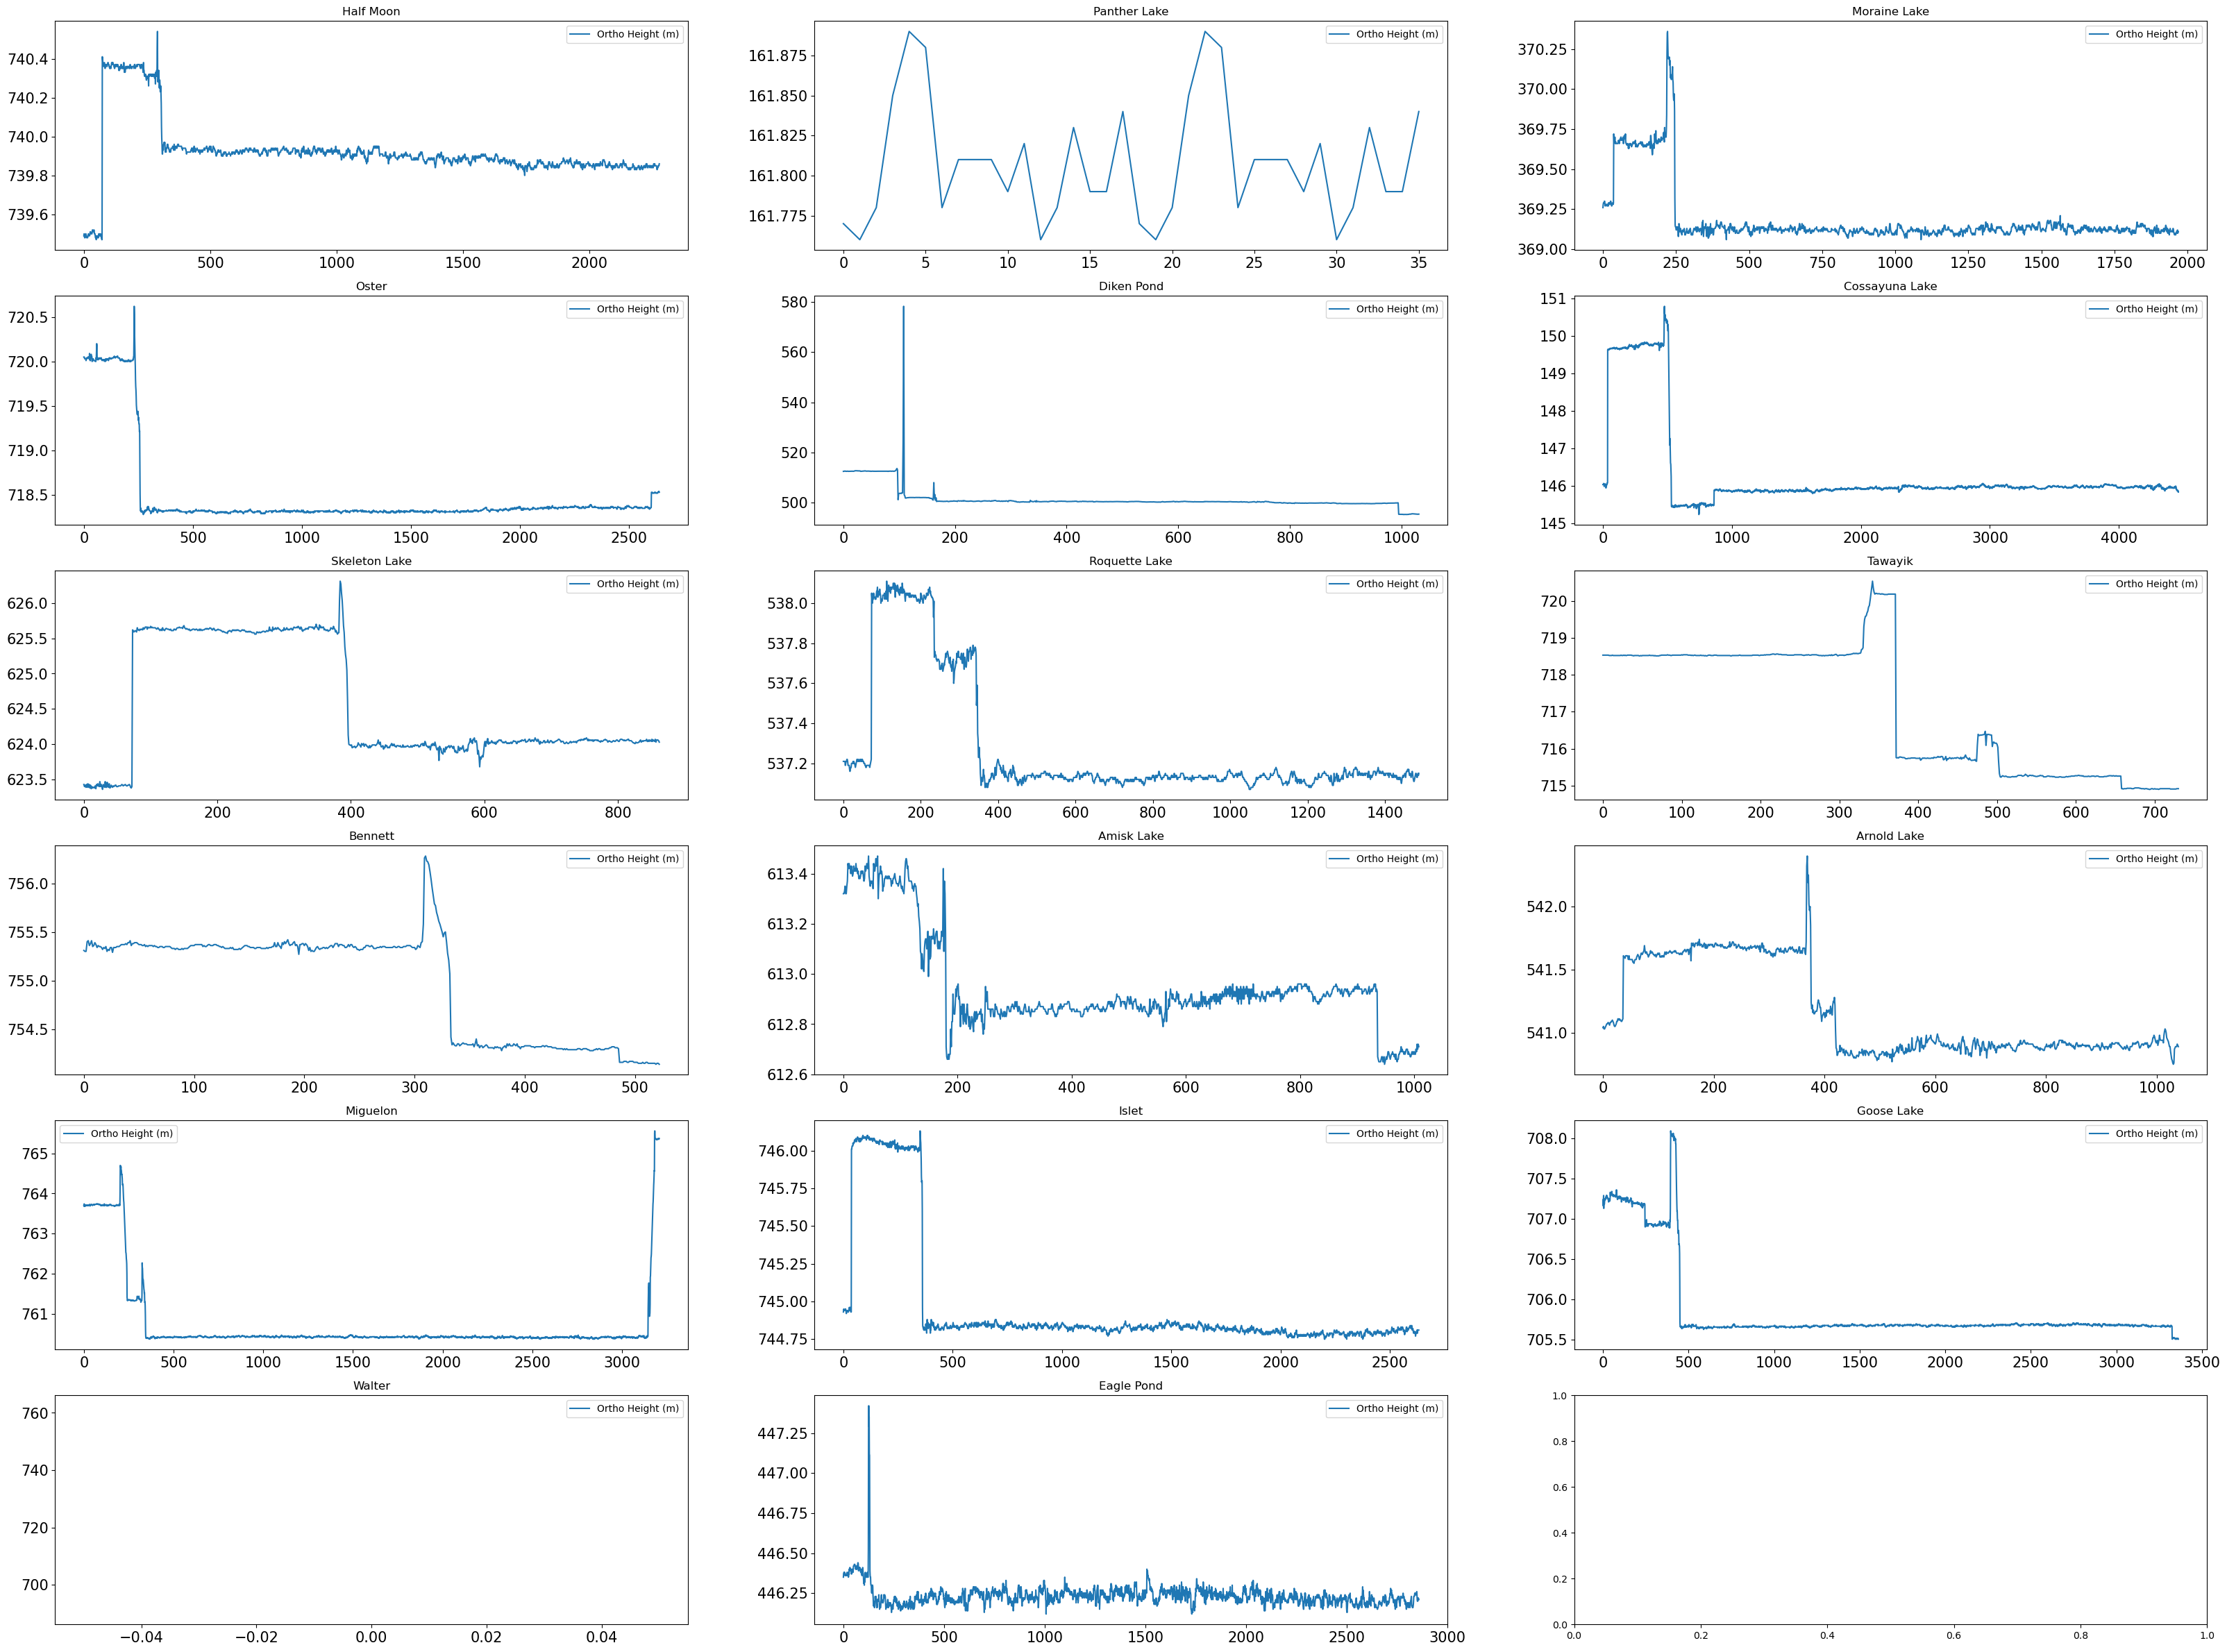

In [69]:
df_all_1s_final['lake'].unique()
df_gnss_total=pd.DataFrame()
# fig, ax=plt.subplots(len(df_all_1s_final['lake'].unique()), figsize=(8,20))
# fig1, ax1=plt.subplots(len(df_all_1s_final['lake'].unique()), figsize=(8,40))
# fig, ax=plt.subplots(len(df_all_1s_final['lake'].unique()), figsize=(8,20))
x=int(len(df_all_1s_final['lake'].unique())/3+1)
fig1, ax1=plt.subplots(x, 3, figsize=(40,30))
i=0
j=0
df_results=pd.DataFrame()
for lake in list_lakes:
    df=df_all_1s_final.loc[df_all_1s_final['lake']==lake].copy()
    if df.shape[0]!=0:
        start_row=((df_lakes['Lake']==lake)&(df_lakes['Start_End']=='S'))
        end_row=((df_lakes['Lake']==lake)&(df_lakes['Start_End']=='E'))  
        val_start=df_lakes.loc[start_row, ['Right', 'Left','Back']].values[0]
        val_end=df_lakes.loc[end_row, ['Right', 'Left','Back']].values[0]
        meanAh=np.mean(np.concatenate((val_start, val_end)))
        stdAh=np.std(np.concatenate((val_start, val_end)))
        
        meanOth=df['Ortho Height (m)'].mean()
        stdOth=df['Ortho Height (m)'].std()
        surface_GNSS=meanOth-meanAh
        surface_Error=stdOth+stdAh+0.01
        
        q95=df['Ortho Height (m)'].quantile(q=0.95)
        
        
        mean95=df.loc[df['Ortho Height (m)']<=q95, 'Ortho Height (m)'].mean()
        
        std95=df.loc[df['Ortho Height (m)']<=q95, 'Ortho Height (m)'].std()
        surface_GNSS95=mean95-meanAh
        surface_Error_95=stdAh+std95+0.01
        
        df_output=pd.DataFrame(data={'lake':lake, 'surface_GNSS':surface_GNSS, 'surface_Error':surface_Error, 'stdOth':stdOth, 
                                     'stdAh':stdAh, 'surface_GNSS95':surface_GNSS95, 'surface_Error_95':surface_Error_95, 'std95':std95}, index=[0])
        df_results=pd.concat((df_results, df_output), axis=0, ignore_index=True)
        df.plot(y='Ortho Height (m)', use_index=True,title=lake,ax=ax1[i,j], label=None )
        # df['Ortho Height (m)'].plot(kind='hist', title=lake,ax=ax[i,j])
        ax1[i,j].tick_params(labelsize = 15)
        
        if j>=2:
            j=0
            if i>=x:
                i=0
            else:
                i=i+1
        else:
            j=j+1
            
            
        
        
        
        # print([medianOth,medianAh], [stdOth,stdAh])
        print(lake,[surface_GNSS,surface_Error, stdOth,stdAh,0.01] )
fig.tight_layout()

In [70]:
df_results

,lake,surface_GNSS,surface_Error,stdOth,stdAh,surface_GNSS95,surface_Error_95,std95
0,Half Moon,686.093925,0.407514,0.161812,0.235702,686.081533,0.391155,0.145453
1,Panther Lake,107.891111,0.233916,0.037577,0.186339,107.886275,0.228955,0.032616
2,Moraine Lake,315.188619,0.204562,0.194562,0.000000,315.159373,0.144447,0.134447
3,Oster,655.825204,0.976974,0.495570,0.471405,655.747447,0.841557,0.360152
4,Diken Pond,447.355116,4.568105,4.558105,0.000000,446.729797,3.002633,2.992633
5,Cossayuna Lake,93.312035,1.216453,1.206453,0.000000,93.133005,0.934114,0.924114
6,Skeleton Lake,561.562723,0.851285,0.841285,0.000000,561.508703,0.830156,0.820156
7,Roquette Lake,483.278380,0.319189,0.309189,0.000000,483.240063,0.271829,0.261829
8,Tawayik,663.917000,2.190006,1.708601,0.471405,663.753348,2.076406,1.595001
9,Bennett,701.147871,0.784882,0.539180,0.235702,701.108815,0.764038,0.518336


In [152]:
np.std(np.concatenate((val_start, val_end)))

0.23570226039551584

In [36]:
#For upstate newyork

#1. Read the master file
#2. Read the files from PPP
#2.1 Distinguish between 15 s and 1 s measurements LOG1 vs LOG2

import os
from fnmatch import fnmatch

root = '../data/GNSS/upstate_NY_full_output_fromPPP/'
pattern = "*.csv"
df_all_UNY_15s, df_all_UNY_1s=get_time_series_GNSS(root, pattern)
            


In [37]:
df_all_UNY_1s.rename(columns={"latitude_decimal_degree":'latitude', "longitude_decimal_degree":"longitude","ellipsoidal_height_m":"elevation"}, inplace=True)
df_all_UNY_15s.rename(columns={"latitude_decimal_degree":'latitude', "longitude_decimal_degree":"longitude","ellipsoidal_height_m":"elevation"}, inplace=True)

In [38]:
for d in df_all_UNY_1s.day_of_year.unique():
    print (df_all_UNY_1s.loc[df_all_UNY_1s['day_of_year']==d, 'decimal_hour'].min(), 'min time '+str(d))
    print (df_all_UNY_1s.loc[df_all_UNY_1s['day_of_year']==d, 'decimal_hour'].max(), 'max time'+ str(d))


14.72139 min time 153
19.50222 max time153
19.945 min time 160
19.99444 max time160
18.92444 min time 150
20.09944 max time150
13.77083 min time 151
23.50306 max time151
15.70611 min time 152
21.80583 max time152


In [91]:
list_lakes_UNY=df_lakes.loc[df_lakes['day_of_year']<235,'Lake'].unique()
list_lakes_UNY

array(['Peach Lake', 'Cossayuna Lake', 'Roquette Lake', 'Eagle Pond',
       'Diken Pond', 'Panther Lake', 'Arnold Lake', 'Moraine Lake'],
      dtype=object)

In [82]:
df_all_UNY_15s


,latitude,longitude,elevation,decimal_hour,day_of_year,year,rcvr_clk_ns
0,35.910151,-78.939375,62.0173,19.94167,160,2022,-1.876772e+07
1,35.910151,-78.939375,61.9765,19.94583,160,2022,-1.876789e+07
2,35.910151,-78.939375,61.9849,19.95000,160,2022,2.319567e+05
3,35.910151,-78.939375,61.9808,19.95417,160,2022,2.319436e+05
4,35.910151,-78.939375,62.0088,19.95833,160,2022,2.319341e+05
5,35.910151,-78.939375,61.9920,19.96250,160,2022,2.319241e+05
6,35.910151,-78.939375,62.0319,19.96667,160,2022,2.319153e+05
7,35.910151,-78.939375,61.9578,19.97083,160,2022,2.319109e+05
8,35.910151,-78.939375,61.9641,19.97500,160,2022,2.319069e+05
9,35.910151,-78.939375,61.9832,19.97917,160,2022,2.319018e+05


In [115]:
df_UNY_15s, df_UNY_1s=get_data_for_lake(df_lakes, list_lakes_UNY, df_all_UNY_15s, df_all_UNY_1s)

19.01 (480, 7)
20.01 End date 15
19.01 (3601, 7)
20.01 End date 1
13.01 (298, 7)
15.01 End date 15
13.01 (4462, 7)
15.01 End date 1
22.02 (0, 7)
23.02 End date 15
no data found for this lake Roquette Lake
22.02 (1488, 7)
23.02 End date 1
19.01 (0, 7)
20.01 End date 15
no data found for this lake Eagle Pond
19.01 (2860, 7)
20.01 End date 1
15.01 (68, 7)
16.01 End date 15
15.01 (1032, 7)
16.01 End date 1
20.01 (0, 7)
21.02 End date 15
no data found for this lake Panther Lake
20.01 (1116, 7)
21.02 End date 1
14.01 (69, 7)
15.01 End date 15
14.01 (1040, 7)
15.01 End date 1
18.01 (0, 7)
19.01 End date 15
no data found for this lake Moraine Lake
18.01 (1969, 7)
19.01 End date 1


In [113]:
print(lake,df_UNY_15s.shape)
print(lake,df_UNY_1s.shape)

Half Moon (2102, 8)
Half Moon (37738, 8)


19.01 (523, 7)
20.01 End date 15
19.01 (8396, 7)
20.01 End date 1
13.01 (367, 7)
15.01 End date 15
13.01 (5502, 7)
15.01 End date 1
22.02 (0, 7)
23.02 End date 15
no data found for this lake Roquette Lake
22.02 (1488, 7)
23.02 End date 1
19.01 (523, 7)
20.01 End date 15
19.01 (8396, 7)
20.01 End date 1
15.01 (302, 7)
16.01 End date 15
15.01 (4656, 7)
16.01 End date 1
20.01 (36, 7)
21.02 End date 15
20.01 (2382, 7)
21.02 End date 1
14.01 (309, 7)
15.01 End date 15
14.01 (4641, 7)
15.01 End date 1
18.01 (42, 7)
19.01 End date 15
18.01 (2277, 7)
19.01 End date 1


In [96]:
df_UNY_15s

,latitude,longitude,elevation,decimal_hour,day_of_year,year,rcvr_clk_ns,lake
0,35.910151,-78.939375,62.0173,19.94167,160,2022,-1.876772e+07,Peach Lake
1,35.910151,-78.939375,61.9765,19.94583,160,2022,-1.876789e+07,Peach Lake
2,35.910151,-78.939375,61.9849,19.95000,160,2022,2.319567e+05,Peach Lake
3,35.910151,-78.939375,61.9808,19.95417,160,2022,2.319436e+05,Peach Lake
4,35.910151,-78.939375,62.0088,19.95833,160,2022,2.319341e+05,Peach Lake
5,35.910151,-78.939375,61.9920,19.96250,160,2022,2.319241e+05,Peach Lake
6,35.910151,-78.939375,62.0319,19.96667,160,2022,2.319153e+05,Peach Lake
7,35.910151,-78.939375,61.9578,19.97083,160,2022,2.319109e+05,Peach Lake
8,35.910151,-78.939375,61.9641,19.97500,160,2022,2.319069e+05,Peach Lake
9,35.910151,-78.939375,61.9832,19.97917,160,2022,2.319018e+05,Peach Lake
